## Project 8

**Mohammad Kamal Sadeghabadi Farahani**

### Description

In this project we have implemented DoG and Gabor filters, these are filters that when applied on an image will produce results like simple and complex cells in the retina, and can decode informations about beight ponts in a dark background or dark point in a light background and diffrent lines with diffrent angles in the image.

In [1]:
import torch
import sys
import copy
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image

sys.path.insert(0, '../../')

from cnsproject.imagetools.filters import DoG, gabor, convolve, FilterModes
from cnsproject.encoding.encoders import Time2FirstSpikeEncoder, PoissonEncoder
from cnsproject.plotting.plotting import raster_plot

sys.path.insert(0, '../../')

img_size = (300, 300)
img1 = Image.open('./images/img2.png')

img_tensor1 = torch.tensor(np.asarray(img1.convert('RGB').convert('L').resize(img_size)))

In [2]:
def polt_with_DoG_filter(std1, std2, size, img_tensor, mode):
    F = DoG(std1, std2, size)
    result = convolve(img_tensor, F, mode)
    
    plt.imshow(img_tensor, cmap='gray')
    plt.show()
    
    plt.imshow(F if mode == FilterModes.OnCenter else F * -1, cmap='gray')
    plt.show()
    
    plt.imshow(result, cmap='gray')
    plt.show()
    
    return result

In [13]:
def plot_with_Gabor_filter(lambda_, theta, sigma, gamma, size, img_tensor, mode):
    F = gabor(lambda_, theta, sigma, gamma, size)
    
    result = convolve(img_tensor, F, mode)
    
    plt.imshow(img_tensor, cmap='gray')
    plt.show()
    
    plt.imshow(F if mode == FilterModes.OnCenter else F * -1, cmap='gray')
    plt.show()
    
    plt.imshow(result, cmap='gray')
    plt.show()
    
    return result

In [11]:
def time2first_spike_raster_plot(img_tensor):
    encoder = Time2FirstSpikeEncoder(time=0.01)
    coded = encoder(0, 255, img_tensor)
    print('Time to first spike raster plot:')
    raster_plot([coded], dt=0.001)

In [12]:
def poisson_raster_plot(img_tensor):
    encoder = PoissonEncoder(time=0.01, max_spikes=10)
    coded = encoder(0, 255, img_tensor)
    print('Poisson raster plot:')
    raster_plot([coded], dt=0.001)

### DoG filter

### Expriment 1

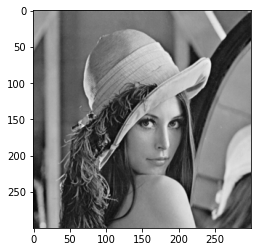

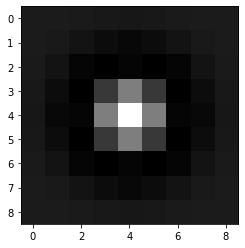

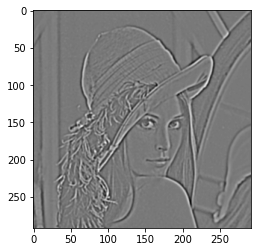

Time to first spike raster plot:


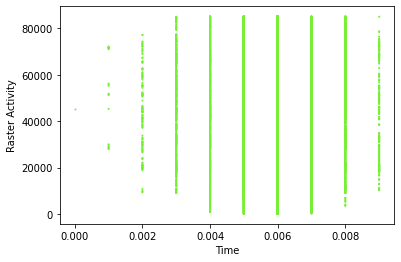

Poisson raster plot:


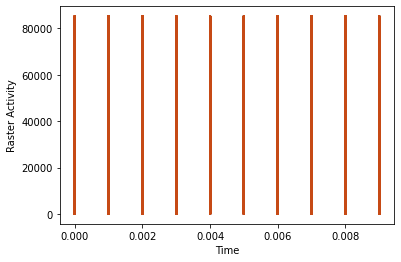


________________________



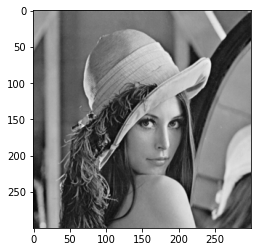

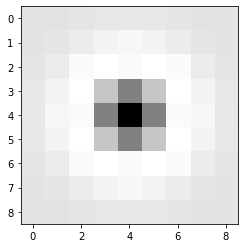

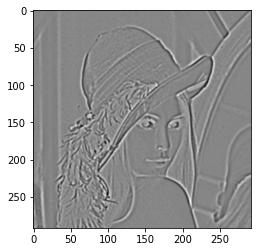

Time to first spike raster plot:


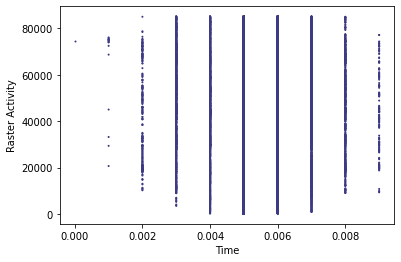

Poisson raster plot:


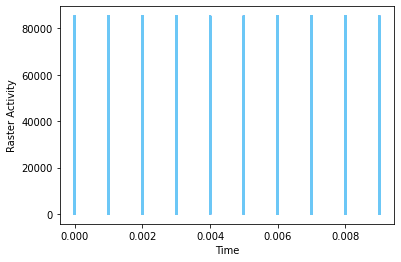

In [14]:
result_on_center = polt_with_DoG_filter(1, 2, 10, img_tensor1, FilterModes.OnCenter)
time2first_spike_raster_plot(result_on_center)
poisson_raster_plot(result_on_center)
print('\n________________________\n')
result_off_center = polt_with_DoG_filter(1, 2, 10, img_tensor1, FilterModes.OffCenter)
time2first_spike_raster_plot(result_off_center)
poisson_raster_plot(result_off_center)

### Analysis of experiment 1

| $\sigma_1$ | $\sigma_2$ |   size   |
| ---------- | ---------- | -------- |
|      1     |      2     |    10    |

As we know the DoG filter is mimicking the role of simple cells in retina, which are recognizing a bright point in a dark contex (in on-center mode) or recognizing a dark center in a bright contex (in off-center mode), as we can see our filter has been able to successfully done this jon in both modes, for the time to first spike raster plot we can see groups of neurons has spiked together, these are the points with the same intensity of contrast between the center point and contex, for example the neurons that represent the pixels that are very bright points in a very dark contex will spike faster than others with less contrast between the point and contex.
the same thing is true about poisson raster plot meaning that the neurons that represent the points that have bigger contrast with their background will spike with higher frequency (but here because we have a lot of neurons the poisson raster plot is not very clear).

### Experiment 2

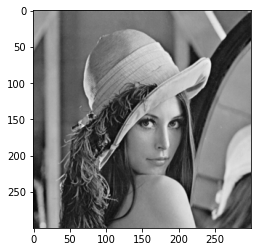

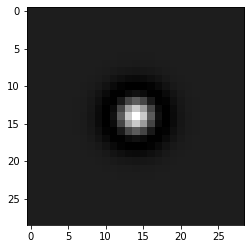

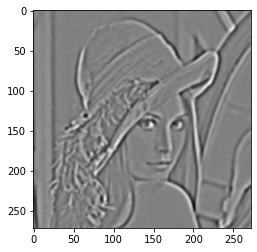

Time to first spike raster plot:


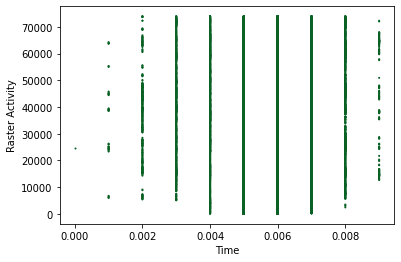

Poisson raster plot:


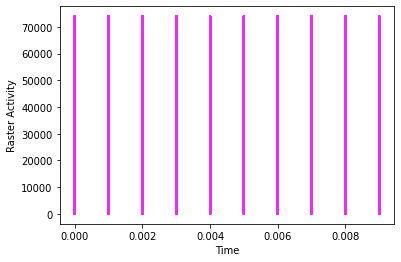


________________________



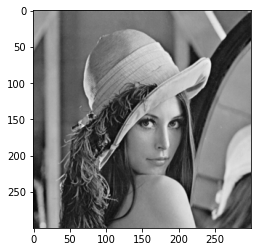

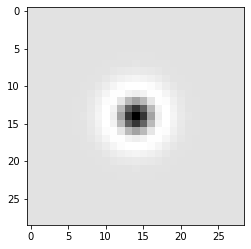

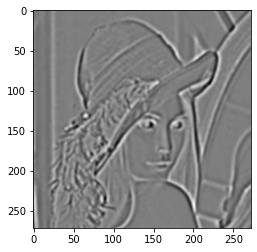

Time to first spike raster plot:


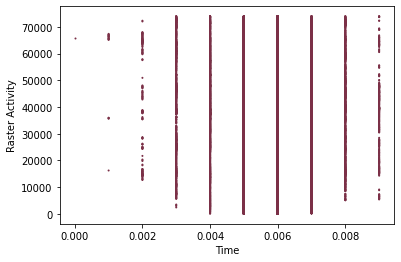

Poisson raster plot:


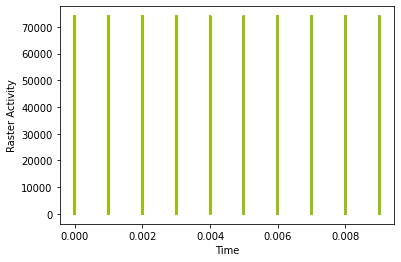

In [15]:
result_on_center = polt_with_DoG_filter(3, 5, 30, img_tensor1, FilterModes.OnCenter)
time2first_spike_raster_plot(result_on_center)
poisson_raster_plot(result_on_center)
print('\n________________________\n')
result_off_center = polt_with_DoG_filter(3, 5, 30, img_tensor1, FilterModes.OffCenter)
time2first_spike_raster_plot(result_off_center)
poisson_raster_plot(result_off_center)

### Analysis of experiment 2

| $\sigma_1$ | $\sigma_2$ |   size   |
| ---------- | ---------- | -------- |
|      3     |      5     |    30    |

Here all things are the same as previous experiment except that we have a bigger filter in terms of size and diffrent standart deviations for two gaussian functions, so the filter will recognize bigger points in bigger contex.

### Gabor filter

### Experiment 1

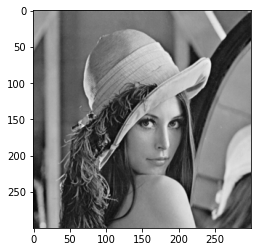

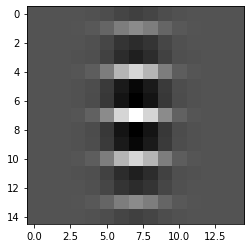

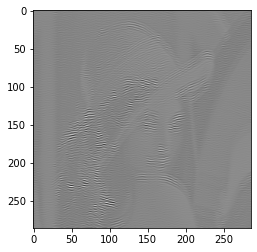

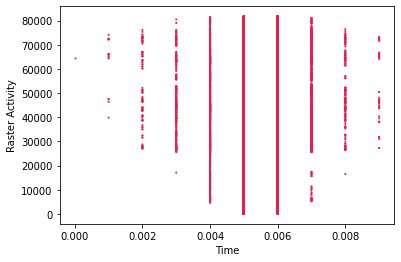

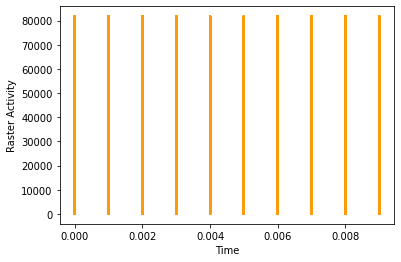


_______________________



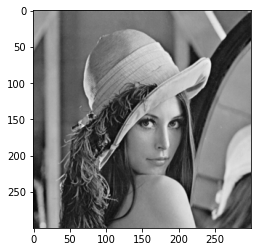

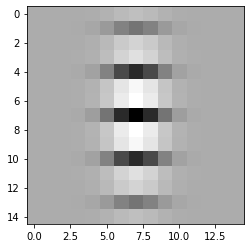

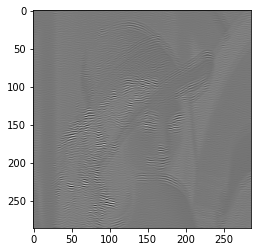

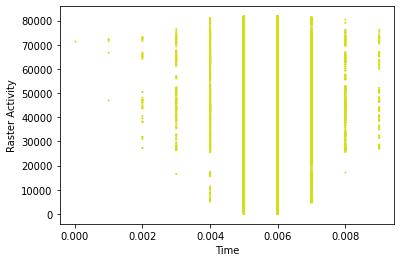

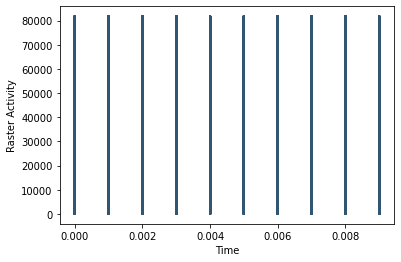

In [10]:
result_on_center = plot_with_Gabor_filter(lambda_=3, theta=np.pi, sigma=4, gamma=3, size=15, img_tensor=img_tensor1, mode=FilterModes.OnCenter)
time2first_spike_raster_plot(result_on_center)
poisson_raster_plot(result_on_center)
print('\n_______________________\n')
result_off_center = plot_with_Gabor_filter(lambda_=3, theta=np.pi, sigma=4, gamma=3, size=15, img_tensor=img_tensor1, mode=FilterModes.OffCenter)
time2first_spike_raster_plot(result_off_center)
poisson_raster_plot(result_off_center)

### Analysis of experiment 1

| $\lambda$ | $\theta$ | $\sigma$ | $\gamma$ | size |
| --------- | -------- | -------- | -------- | ---- |
|      3    |  $\pi$   |    4     |     3    |  15  |

As we know the Gabor filter is used to mimicking the role of complex cells in the retina, which are responsible for recognizing the lines with diffrent orientations and agles, here the $\theta$ which is the angle of line is $\pi$ and this means that our filter should be able to recognize horizontal lines, as we can see our filter has successfully recognized horizontal lines.
In the time to first spike raster plot we have neurons which spike in groups at the same times, theses are neurons that represent the horzontal lines with the same border intesity, for example neurons that represent pixels of lines with a very bold border will spike faster that other neurons that represent lines with pale borders, the same story is true with poisson raster plot, meaning that the neurons that represent the lines with bold border will spike with higher frequency than others that represent lines with pale border.

### Experiment 2

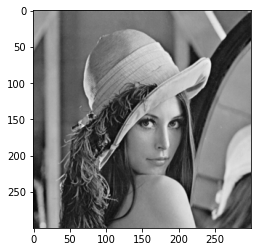

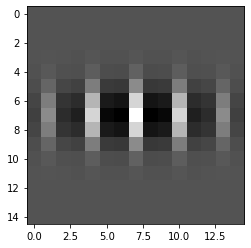

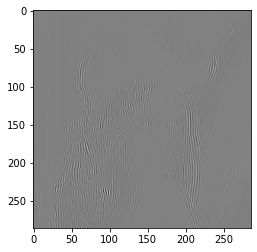

Time to first spike raster plot:


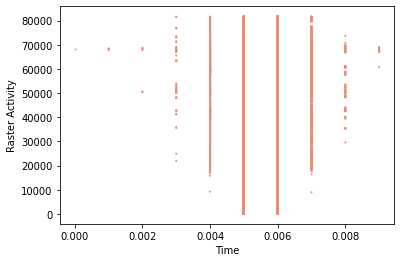

Poisson raster plot:


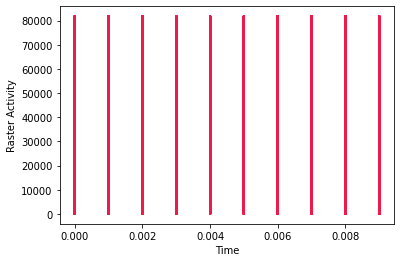


_______________________



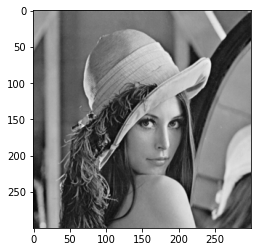

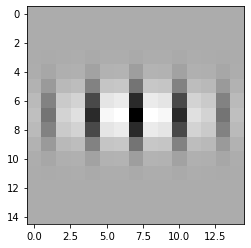

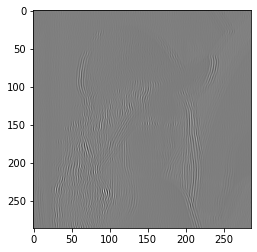

Time to first spike raster plot:


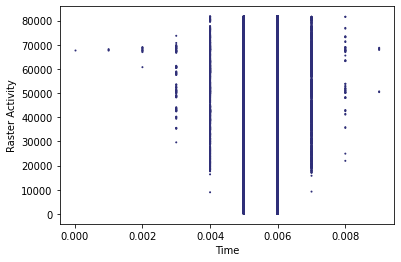

Poisson raster plot:


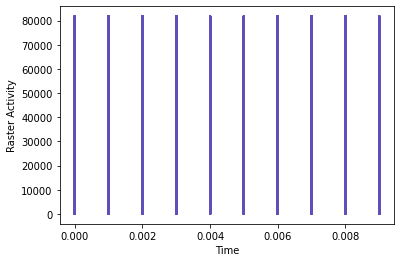

In [16]:
result_on_center = plot_with_Gabor_filter(lambda_=3, theta=np.pi / 2, sigma=4, gamma=3, size=15, img_tensor=img_tensor1, mode=FilterModes.OnCenter)
time2first_spike_raster_plot(result_on_center)
poisson_raster_plot(result_on_center)
print('\n_______________________\n')
result_off_center = plot_with_Gabor_filter(lambda_=3, theta=np.pi / 2, sigma=4, gamma=3, size=15, img_tensor=img_tensor1, mode=FilterModes.OffCenter)
time2first_spike_raster_plot(result_off_center)
poisson_raster_plot(result_off_center)

### Analysis of experiment 2

| $\lambda$ | $\theta$ | $\sigma$ | $\gamma$ | size |
| --------- | -------- | -------- | -------- | ---- |
|      3    |  $\dfrac{\pi}{2}$   |    4     |     3    |  15  |

Here everything is the same as the previous experiement except that the $\theta$ parameter here is $\dfrac{\pi}{2}$ which means that our filter will recognize vertical lines and in fact if we see the output results it has successfully recognized the horizontal lines.